In [4]:
#Persistence Algorithm (the “naive” forecast)
#How to Make Baseline Predictions for Time Series Forecasting with Python
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
 
def parser(xx):
    return datetime.strptime(''+xx, '%Y-%m-%d')
 
series = read_csv('APT.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())

<ipython-input-4-5bee140effbc>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


            Open  High   Low  Close  Adj Close  Volume
Date                                                  
2017-06-29  2.70  2.70  2.65   2.70       2.70   53203
2017-06-30  2.68  2.95  2.68   2.95       2.95   21668
2017-07-03  3.02  3.08  3.00   3.00       3.00   61756
2017-07-04  3.00  3.02  2.99   3.00       3.00   64658
2017-07-05  3.00  3.20  2.99   3.18       3.18  443935


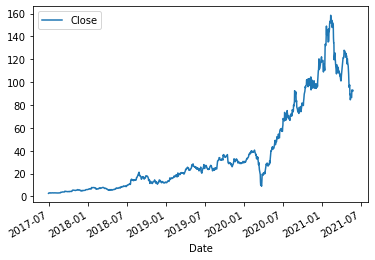

In [5]:
series= series[['Close']]
series.plot()
pyplot.show()

In [6]:
#Step 1: Define the Supervised Learning Problem
#Transform the univariate dataset into a supervised learning problem
#The first step is to load the dataset and create a lagged representation. 
#That is, given the observation at t-1, predict the observation at t+1.
# t-1 column is the input variable, or X, and the t+1 column is the output variable, or y.

# Create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

    t-1   t+1
0   NaN  2.70
1  2.70  2.95
2  2.95  3.00
3  3.00  3.00
4  3.00  3.18


In [7]:
#Step 2: Train and Test Sets
#The next step is to separate the dataset into train and test sets.
#We will keep the first 66% of the observations for “training” and the remaining 34% for evaluation

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]


In [8]:
#Step 3: Persistence Algorithm
# persistence model as a function that returns the value provided as input.

# persistence model
def model_persistence(x):
    return x

In [9]:
#Step 4: Make and Evaluate Forecast
# Once predictions are made for each time step in the training dataset, 
#they are compared to the expected values and a Mean Squared Error (MSE) score is calculated.

# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

Test MSE: 11.588


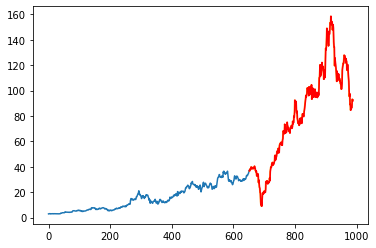

In [11]:
# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions], color='red')
pyplot.show()